In [46]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
import pandas as pd
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar o arquivo CSV
pokemons = pd.read_csv('/content/sample_data/pokemon.csv')

# Diretório onde as imagens estão armazenadas
img_dir = "/content"

# Carregar as imagens e etiquetas
img_size = (32, 32)
images = []
labels = []


In [37]:
pokemons.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [47]:
for index, row in pokemons.iterrows():
    img_path = os.path.join(img_dir, row['Name'] + '.png')
    if os.path.exists(img_path):
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(row['Type1'])
    else:
        print(f"Imagem {img_path} não encontrada.")

Epoch 1/100
17/17 [==============================] - 2s 44ms/step - loss: 2.7874 - accuracy: 0.1412 - val_loss: 2.7120 - val_accuracy: 0.1615
Epoch 2/100
17/17 [==============================] - 1s 31ms/step - loss: 2.4915 - accuracy: 0.2031 - val_loss: 2.6540 - val_accuracy: 0.1615
Epoch 3/100
17/17 [==============================] - 1s 33ms/step - loss: 2.2628 - accuracy: 0.3191 - val_loss: 2.6024 - val_accuracy: 0.2154
Epoch 4/100
17/17 [==============================] - 1s 31ms/step - loss: 2.0333 - accuracy: 0.3946 - val_loss: 2.6569 - val_accuracy: 0.1923
Epoch 5/100
17/17 [==============================] - 1s 30ms/step - loss: 1.8359 - accuracy: 0.4507 - val_loss: 2.6666 - val_accuracy: 0.2077
Epoch 6/100
17/17 [==============================] - 1s 30ms/step - loss: 1.5643 - accuracy: 0.5474 - val_loss: 2.8115 - val_accuracy: 0.1846
Epoch 7/100
17/17 [==============================] - 1s 32ms/step - loss: 1.3452 - accuracy: 0.6422 - val_loss: 2.9151 - val_accuracy: 0.1923
Epoch 

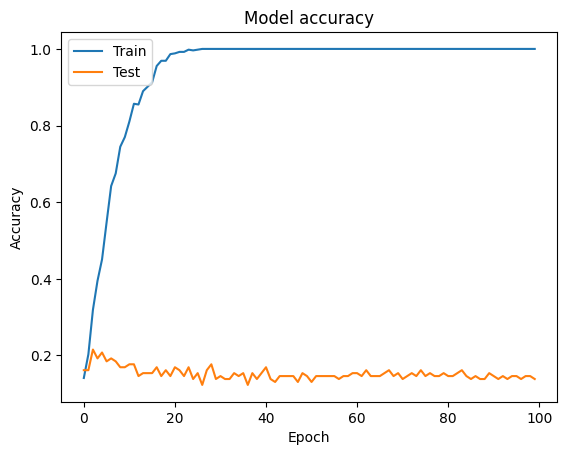

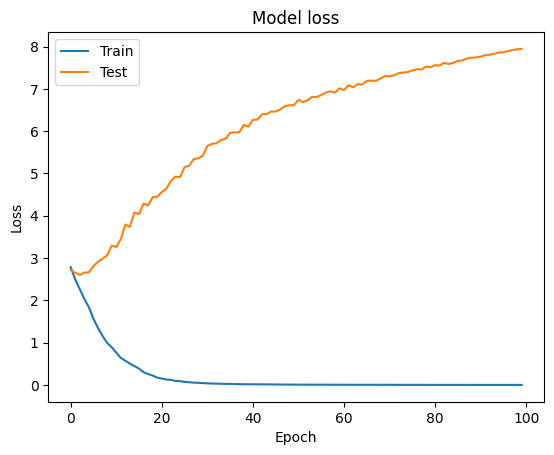

In [48]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dense(units=len(label_encoder.classes_), activation="softmax"))

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = cnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Gráficos de treinamento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()